# Corona Tracker
#### Get the latest Corona virus stats from <a href="https://www.worldometers.info/coronavirus" style="text-decoration: none"><b>worldmeters</b></a> website

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import corona_tracker

Update complete


###### Read in the file from web scraping module "corona_tracker.py"

In [2]:
countries = pd.read_csv('countries.csv', index_col=0)
countries.index += 1

#### Query Set: Return the dataset ordered how you'd like.
The <em>group_by()</em> function takes a number of optional parameters and returns a dataset.<br>
<ul>
    <li><b>column</b>: order by column name. Default is <em>Total Cases</em></li>
    <li><b>region</b>: set which region/continent you wish to examine. Default is <em>Global</em></li>
    <li><b>number</b>: limit the number of results displayed. Default is <em>10</em>. Set <em>number='all'</em> to see all results
    <li><b>min_population</b>: Ignore smaller countries by setting a minimum population. Default is <em>1 million</em></li>
</ul>

In [25]:
def group_by(column="Total Cases", region="Global", number=10, min_population=1000000):
    """ Set number='all' to see all results in the query set """
    filtered = countries[countries['Population'] >= min_population]
    if region == 'Global':
        if number != 'all':
            return filtered.groupby(by=column).max().sort_index(ascending=False).head(number)    
        else:
            return filtered.groupby(by=column).max().sort_index(ascending=False)
    else:
        if number != 'all':
            return filtered[filtered['Continent'] == region].groupby(by=column).max().sort_index(ascending=False).head(number)    
        else: 
            return filtered[filtered['Continent'] == region].groupby(by=column).max().sort_index(ascending=False)


###### Example 1:
See the top 15 worst affected countries in Europe with populations above 1 million by <strong>total deaths per million</strong>

In [28]:
group_by(column="Total Deaths per Million", region='Europe', number=15)


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Cases per Million,Continent,Population
Total Deaths per Million,,,,,,,,,
2819.0,Hungary,774399,27172.0,497084,250143,702.0,80330,Europe,9640166
2717.0,Czechia,1626033,29141.0,1542244,54648,676.0,151607,Europe,10725307
2579.0,Bosnia and Herzegovina,196732,8418.0,157095,31219,NaN,60273,Europe,3264008
2343.0,Bulgaria,401109,16182.0,332418,52509,714.0,58087,Europe,6905341
2276.0,North Macedonia,151122,4742.0,130910,15470,124.0,72540,Europe,2083304
2126.0,Slovakia,381180,11611.0,361535,8034,335.0,69790,Europe,5461816
2072.0,Belgium,979034,24104.0,846692,108238,892.0,84174,Europe,11631038
2037.0,Slovenia,238421,4236.0,224907,9278,155.0,114671,Europe,2079173
1986.0,Italy,3981512,119912.0,3413451,448149,2748.0,65931,Europe,60388692


###### Example 2:
See which countries have the most active cases in Asia

In [9]:
group_by(column='Active Cases', region='Asia')

,Country,Total Cases,Total Deaths,Total Recovered,Critical Cases,Total Cases per Million,Total Deaths per Million,Continent,Population
Active Cases,,,,,,,,,
2978709,India,17997267,201187.0,14817371,8944.0,12937,145.0,Asia,1391123637
504262,Turkey,4710582,39057.0,4167263,3549.0,55365,459.0,Asia,85082577
465859,Iran,2459906,70966.0,1923081,5338.0,28983,836.0,Asia,84873060
109139,Iraq,1045010,15348.0,920523,539.0,25514,375.0,Asia,40958650
100502,Indonesia,1657035,45116.0,1511417,NaN,6006,164.0,Asia,275893373
88207,Pakistan,810231,17530.0,704494,5214.0,3611,78.0,Asia,224394761
70990,Bangladesh,754614,11305.0,672319,NaN,4545,68.0,Asia,166033991
67769,Philippines,1020495,17031.0,935695,750.0,9212,154.0,Asia,110774857
61701,Lebanon,522763,7197.0,453865,632.0,76874,1058.0,Asia,6800279


#### Calculate totals
Use the <em>get_totals()</em> function to sum values over a region<br>
Takes two arguments, returns a string with the desired values.
<ul>
    <li><b>column</b>: Required. Select which column you want to sum over.</li>
    <li><b>region</b>: Select which region. Default is <em>Global</em> and returns global totals. If a country or continent
        is selected, then the total for the selected region is returned.
</ul>

In [30]:
def get_totals(column, region='Global'):
    if region == 'Global':
        total = countries[column].sum()
        return(f'{column}: {total:,} globally')
    elif region in countries.Continent.unique():
        total = countries[countries['Continent'] == region][column].sum()
        return(f'{column}: {total:,} in {region}')
    elif region in countries.Country.unique():
        total = countries[countries['Country'] == region][column].sum()
        return(f'{column}: {total:,} in {region}')
    else:
        print("Entry not valid. Check your spelling")

###### Example:
Get the total deaths in North America

In [34]:
get_totals('Total Deaths', 'North America')

'Total Deaths: 857,857.0 in North America'

#### Calculate averages

In [35]:
def get_mean(column, region='Global'):
    if region == 'Global':
        total = countries[column].mean()
        return(f'Average {column}: {total:,.2f} globally')
    elif region in countries.Continent.unique():
        total = countries[countries['Continent'] == region][column].mean()
        return(f'Average {column}: {total:,.2f} in {region}')
    elif region in countries.Country.unique():
        total = countries[countries['Country'] == region][column].mean()
        return(f'Average {column}: {total:,.2f} in {region}')
    else:
        print("Entry not valid. Check your spelling")

###### Example:
Get the average total deaths per million in Africa and Europe

In [125]:
print(get_mean('Total Deaths per Million', region='Africa'))
print(get_mean('Total Deaths per Million', region='Europe'))

Average Total Deaths per Million: 122.19 in Africa
Average Total Deaths per Million: 1,368.02 in Europe


# John Hopkins data
Sourced from the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). For more info and to see the raw data, visit their open-source <a href= "https://github.com/CSSEGISandData/COVID-19" style="text-decoration:none">github repository</a>.

###### Retrieve and clean the data

In [126]:
# Get csv files
cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
cases_data = pd.read_csv(cases)
deaths_data = pd.read_csv(deaths)

# Drop duplicates
cases_data.drop_duplicates(subset='Country/Region', keep='last', inplace=True)
deaths_data.drop_duplicates(subset='Country/Region', keep='last', inplace=True)

# Reset index to country names
cases_data.set_index('Country/Region', inplace=True)
deaths_data.set_index('Country/Region', inplace=True)

# Drop irrelevant columns
cases_data.drop(columns=['Province/State', 'Lat', 'Long'], inplace=True)
deaths_data.drop(columns=['Province/State', 'Lat', 'Long'], inplace=True)


In [127]:
deaths_data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2539,2546,2549,2557,2561,2565,2572,2582,2592,2598
Albania,0,0,0,0,0,0,0,0,0,0,...,2342,2347,2353,2358,2364,2367,2372,2378,2379,2383
Algeria,0,0,0,0,0,0,0,0,0,0,...,3155,3160,3165,3172,3181,3190,3198,3207,3217,3225
Andorra,0,0,0,0,0,0,0,0,0,0,...,123,123,123,123,123,123,124,124,124,124
Angola,0,0,0,0,0,0,0,0,0,0,...,561,563,565,570,572,574,577,579,583,587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,3017,3047,3078,3096,3115,3138,3151,3167,3184,3201
Yemen,0,0,0,0,0,0,0,0,0,0,...,1126,1132,1138,1147,1157,1165,1175,1187,1205,1207


###### Transform the dataframe and re-index as DateTimeIndex

In [128]:
deaths_pd = deaths_data.T
deaths_pd.index = pd.to_datetime(deaths_pd.index)
cases_pd = cases_data.T
cases_pd.index = pd.to_datetime(cases_pd.index)


In [129]:
deaths_pd.Sweden

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2021-04-23    13923
2021-04-24    13923
2021-04-25    13923
2021-04-26    13923
2021-04-27    13968
Name: Sweden, Length: 462, dtype: int64

In [130]:
cases_pd.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2021-04-23,58542,130270,120562,13007,25279,1222,2824652,212114,982,604823,...,4401109,179537,88280,4,189381,2830,289120,6056,91251,38045
2021-04-24,58730,130409,120736,13024,25492,1227,2845872,212878,984,606954,...,4403170,182326,88679,4,190523,2833,290259,6105,91317,38064
2021-04-25,58843,130537,120922,13060,25609,1227,2860884,213288,986,608979,...,4404882,184865,89027,4,191518,2843,290972,6137,91358,38086
2021-04-26,59015,130606,121112,13083,25710,1228,2879677,213469,990,610545,...,4406946,187349,89355,4,192498,2852,292052,6183,91378,38102
2021-04-27,59225,130736,121344,13121,25942,1232,2905172,214064,994,612170,...,4409631,190096,89630,4,193721,2857,293466,6220,91418,38164


## Plots and Graphs

#### Global Data

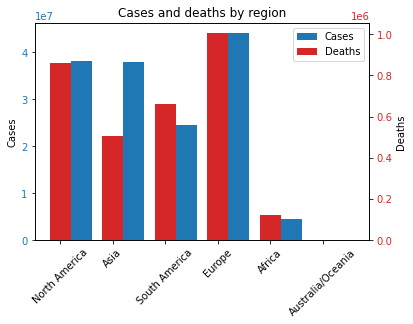

In [131]:
import numpy as np
regions = []
for continent in countries.Continent.unique():
    regions.append(continent)

death_sum = []
for continent in countries.Continent.unique():
    death_sum.append(countries[countries['Continent'] == continent]['Total Deaths'].sum())

cases_sum = []
for continent in countries.Continent.unique():
    cases_sum.append(countries[countries['Continent'] == continent]['Total Cases'].sum())

    
width = 0.4
xpos = np.arange(len(regions))
fig, ax1 = plt.subplots()

plt.xticks(ticks=np.arange(len(regions)), labels=regions, rotation=45)
plt.title('Cases and deaths by region')

color = 'tab:blue'
ax1.set_ylabel('Cases')
ax1.bar(xpos+width, cases_sum, width, 
       label='Cases', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Deaths')
ax2.bar(xpos, death_sum, width, label='Deaths', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(bbox_to_anchor=(0.5, 0.5, 0.4, 0.38))
plt.show()

#### Compare regions

#### Country

###### Rolling averages for a selected country over a given period.

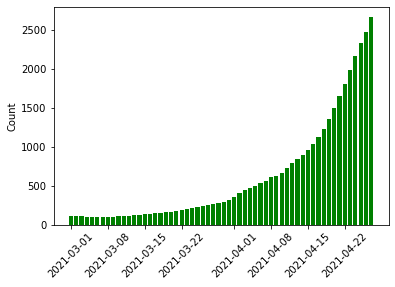

In [141]:
def rolling_average(query, region, period, rolling):
    query = query.lower()
    if query == 'total deaths' or query == 'deaths':
        data = deaths_pd[region].last(period).diff().rolling(window=rolling).mean()
        return data
    elif query == 'total cases' or query == 'cases':
        data = cases_pd[region].last(period).diff().rolling(window=rolling).mean()
        return data


data = rolling_average('Total deaths', 'India', '10W', 7)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.bar(data.index, data, color='green')
plt.show()


###### Country-by-Country Comparison

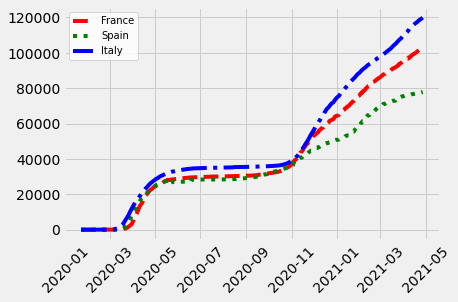

In [143]:
%matplotlib inline

countries = ['France', 'Spain', 'Italy']
#countries = ['Sweden', 'Denmark', 'Norway']
selection = deaths_pd[countries]

with plt.style.context('fivethirtyeight'):
    plt.plot(deaths_pd.index, selection[countries[0]], 'r', linestyle='dashed', label=countries[0])
    plt.plot(deaths_pd.index, selection[countries[1]], 'g', linestyle='dotted', label=countries[1])
    plt.plot(deaths_pd.index, selection[countries[2]], 'b', linestyle='dashdot', label=countries[2])

plt.xticks(rotation=45)
plt.legend()
plt.show()


#### Case-Fatality Ratio


In [66]:
country = "India"
print(f'{deaths_pd[country].iloc[-1]*100/cases_pd[country].iloc[-1]:.3f}%')

1.118%
